# SVM Classification

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
warnings.simplefilter(action = "ignore", category= FutureWarning)
warnings.simplefilter(action = "ignore", category= UserWarning)

### Data

The data simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.


In [3]:
df = pd.read_csv("../DATA/mouse_viral_study.csv")

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<Axes: title={'center': 'The data is higly separable using hyperspace'}, xlabel='Med_1_mL', ylabel='Med_2_mL'>

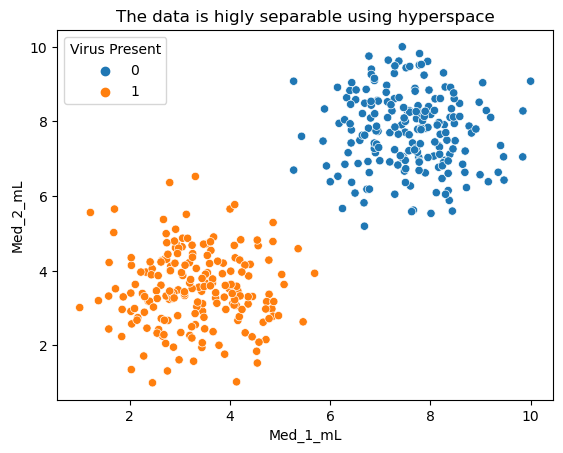

In [6]:
plt.title('''The data is higly separable using hyperspace''')
sns.scatterplot(data = df, x = "Med_1_mL", y = "Med_2_mL", hue ="Virus Present")

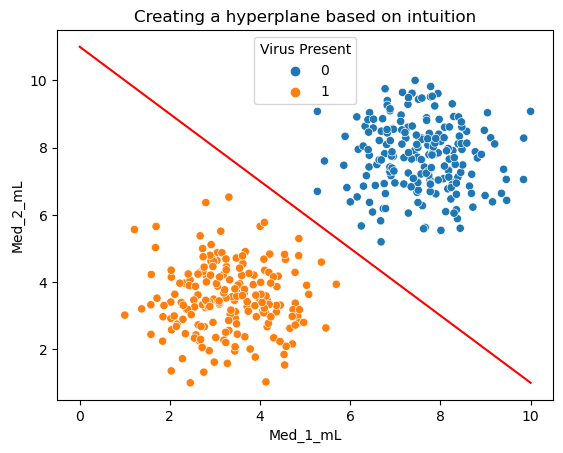

In [7]:
plt.title('''Creating a hyperplane based on intuition''')
sns.scatterplot(data = df, x = "Med_1_mL", y = "Med_2_mL", hue ="Virus Present")

# 2-D Hyperspces (lines in a 2D plane)
x = np.linspace(0,10,100)
m, b = -1, 11   # slope & y - intercept
y = m*x + b
plt.plot(x,y, "red")

But this is not the only equation of a line that can separate these two classes (presence and absense of virus)

### SVM

In [8]:
from sklearn.svm import SVC

In [9]:
X = df.drop("Virus Present", axis = 1)
y = df["Virus Present"]

In [10]:
model = SVC(kernel = "linear", C = 1000)

In [11]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

**To visualize the model we use a script from the documentation**

.py File present in the directory

In [12]:
from svm_margin_plot import plot_svm_boundary

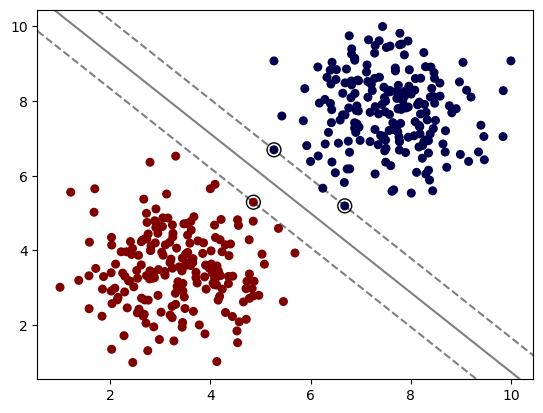

In [13]:
plot_svm_boundary(model , X, y)

In [14]:
model0 = SVC(kernel = "linear", C = 0.1)

In [15]:
model0.fit(X,y)

SVC(C=0.1, kernel='linear')

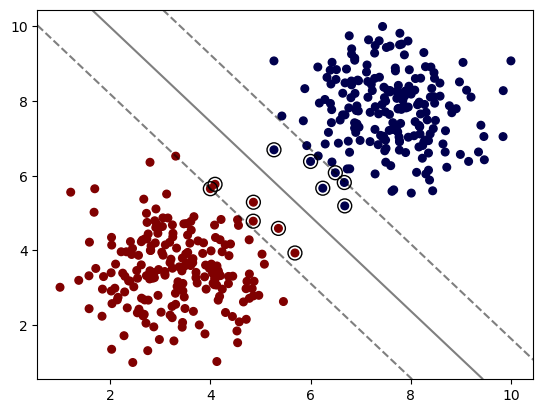

In [16]:
plot_svm_boundary(model0, X, y)

In [17]:
model1 = SVC(kernel = "linear", C = 0.001)

In [18]:
model1.fit(X, y)

SVC(C=0.001, kernel='linear')

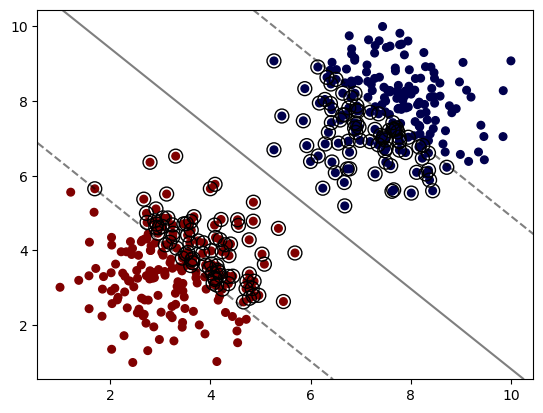

In [19]:
plot_svm_boundary(model1, X, y)

#### Using a radial basis function kernel for the classification

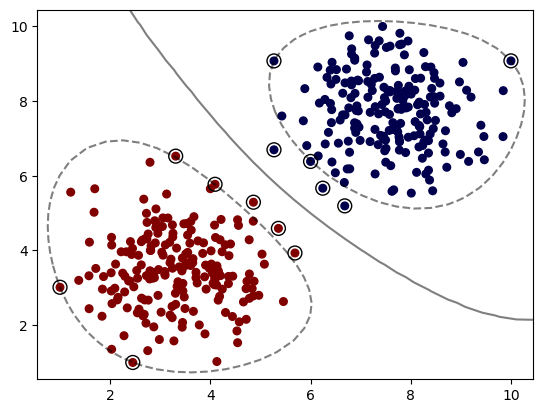

In [20]:
model2 = SVC(kernel="rbf", C = 1, gamma = "scale")
model2.fit(X, y)
plot_svm_boundary(model2, X, y)

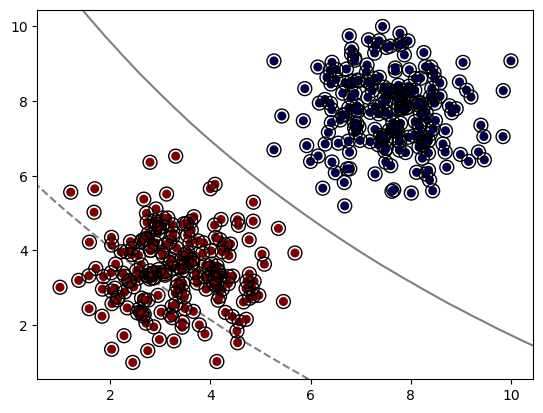

In [21]:
model3 = SVC(kernel = "sigmoid", C = 0.1)
model3.fit(X, y)
plot_svm_boundary(model3, X, y)

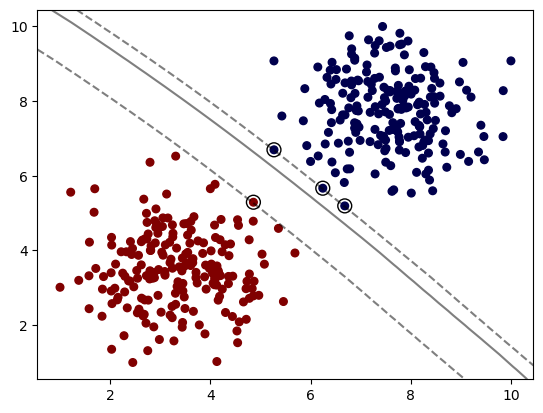

In [22]:
model4 = SVC(kernel="poly", C = 1, degree = 16)
model4.fit(X, y)
plot_svm_boundary(model4, X, y)

### Too many parameteres to tune,

#### Just use cross validation

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
svm_model = SVC()

In [25]:
Grid = {"kernel" : ["linear", "rbf", "sigmoid", "poly"], "C" : [0.01, 0.1 , 1]}

In [26]:
model = GridSearchCV(svm_model, param_grid= Grid)

In [27]:
model.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [28]:
model.best_params_

{'C': 0.01, 'kernel': 'linear'}